In [30]:
#import required libraries
import pandas as pd

#load dataset
data=pd.read_csv('Mall_Customers.csv')
data=data.drop('CustomerID',axis=1)
data


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [31]:
# scaling
from sklearn.preprocessing import StandardScaler
num_col=data.select_dtypes(include='number').columns
ss=StandardScaler()
data[num_col]=ss.fit_transform(data[num_col])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,Female,-0.276302,2.268791,1.118061
196,Female,0.441365,2.497807,-0.861839
197,Male,-0.491602,2.497807,0.923953
198,Male,-0.491602,2.917671,-1.250054


In [32]:
# encoding
data=pd.get_dummies(data,columns=['Gender'],drop_first=True)
data['Gender_Male']=data['Gender_Male'].astype(int)
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [39]:
#model traing
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters= 5, linkage= 'average',metric='manhattan')
model.fit(data)

label=model.labels_
data['cluster']=label

In [40]:
# model evaluation
from sklearn.metrics import silhouette_score

features = data.drop(columns=['cluster'])
mask = label != -1  # remove noise
if len(set(label[mask])) > 1:
    score = silhouette_score(features[mask], label[mask])
    print("Silhouette Score:", score)
else:
    print("Silhouette score not applicable (only 1 cluster found).")

print("Numper of cluster:",len(set(label)))

Silhouette Score: 0.34981610412757697
Numper of cluster: 5


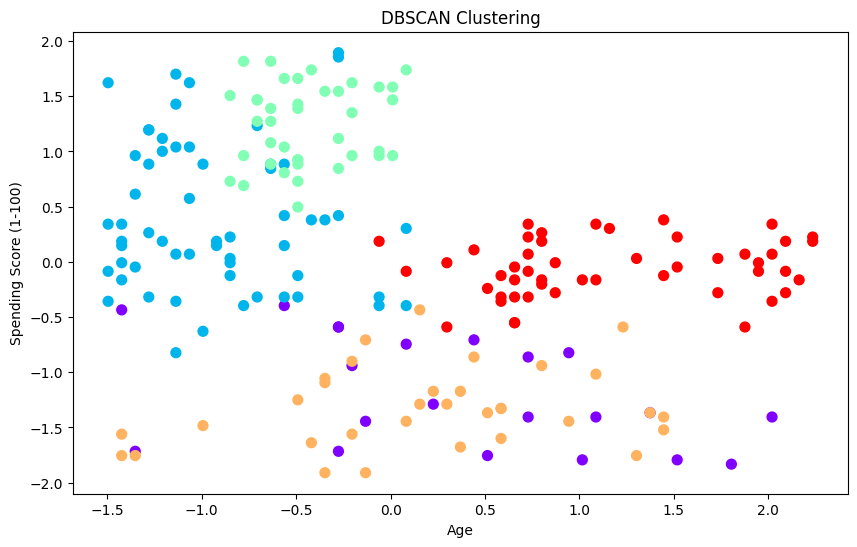

In [41]:
# visualize the cluster
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('DBSCAN Clustering')
plt.scatter(data['Age'],data['Spending Score (1-100)'],c=label,s=50,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [42]:
# parameter tuning
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import itertools
import pandas as pd

# Load your dataset

x=data.drop('cluster',axis=1)# <-- replace with the features you want to use

# Parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None

for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    # Ward linkage only works with Euclidean metric
    if param_dict['linkage'] == 'ward' and param_dict['metric'] != 'euclidean':
        continue

    model = AgglomerativeClustering(
        n_clusters=param_dict['n_clusters'],
        linkage=param_dict['linkage'],
        metric=param_dict['metric']
    )

    labels = model.fit_predict(x)

    if len(set(labels)) > 1:
        score = silhouette_score(x, labels)
        print(f"Params: {param_dict} → Score: {score:.4f}")

        if score > best_score:
            best_score = score
            best_params = param_dict

print("\nBest Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Params: {'n_clusters': 2, 'linkage': 'ward', 'metric': 'euclidean'} → Score: 0.2923
Params: {'n_clusters': 2, 'linkage': 'complete', 'metric': 'euclidean'} → Score: 0.2051
Params: {'n_clusters': 2, 'linkage': 'complete', 'metric': 'manhattan'} → Score: 0.2275
Params: {'n_clusters': 2, 'linkage': 'complete', 'metric': 'cosine'} → Score: 0.2853
Params: {'n_clusters': 2, 'linkage': 'average', 'metric': 'euclidean'} → Score: 0.2935
Params: {'n_clusters': 2, 'linkage': 'average', 'metric': 'manhattan'} → Score: 0.2908
Params: {'n_clusters': 2, 'linkage': 'average', 'metric': 'cosine'} → Score: 0.2994
Params: {'n_clusters': 2, 'linkage': 'single', 'metric': 'euclidean'} → Score: 0.2304
Params: {'n_clusters': 2, 'linkage': 'single', 'metric': 'manhattan'} → Score: 0.2726
Params: {'n_clusters': 2, 'linkage': 'single', 'metric': 'cosine'} → Score: 0.2174
Params: {'n_clusters': 3, 'linkage': 'ward', 'metric': 'euclidean'} → Score: 0.3097
Params: {'n_clusters': 3, 'linkage': 'complete', 'metric':